In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv")

In [39]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

In [38]:
merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

In [9]:
merged_data.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
192,T00323,C0082,P038,2024-09-22 07:51:55,4,588.88,147.22,Aimee Taylor,South America,2022-05-13,TechPro Vase,Home Decor,147.22
904,T00708,C0187,P094,2024-02-12 17:27:50,2,894.68,447.34,Kayla Kelly,South America,2024-08-02,HomeSense Cookware Set,Home Decor,447.34
605,T00378,C0175,P063,2024-08-03 22:08:12,3,100.77,33.59,Matthew Johnson,Asia,2022-04-16,TechPro Novel,Books,33.59
537,T00521,C0148,P011,2024-06-11 02:31:18,4,1044.80,261.20,Matthew Rogers,South America,2023-04-16,SoundWave Desk Lamp,Home Decor,261.20
622,T00751,C0096,P088,2024-03-11 17:07:12,2,527.10,263.55,Benjamin Mcclure,South America,2022-11-18,SoundWave Headphones,Electronics,263.55


In [37]:
missing_values = merged_data.isnull().sum()

In [11]:
missing_values

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [36]:
print("Summary Statistics:")
print(merged_data.describe())

Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  TransactionMonth  
count                           1000  1000.00000       1000.000000  
mean   2023-07-09 02:49:55.199999744   272.55407          6.288000  
min              2022-01-22 00:00:00    16.08000          1.000000  
2

In [35]:
# Regional Transaction Trends
region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Total Revenue by Region:")
print(region_sales)

Total Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


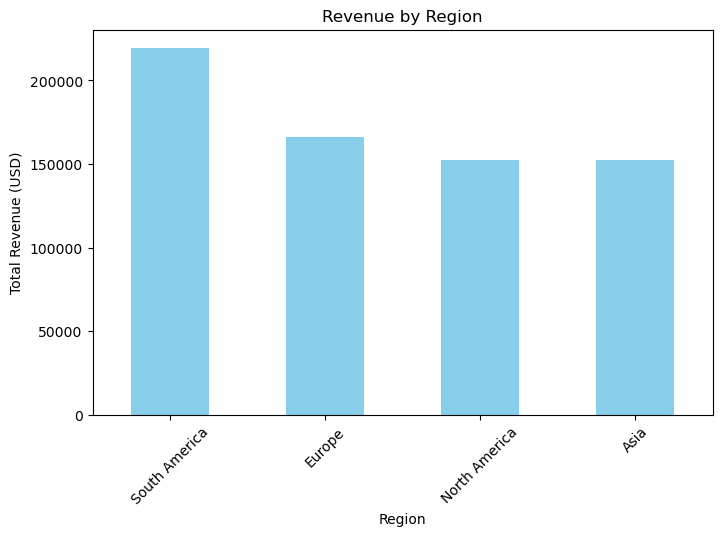

In [28]:
plt.figure(figsize=(8, 5))
region_sales.plot(kind="bar", color="skyblue")
plt.title("Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

In [29]:
# Top-Selling Products
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:")
print(top_products)


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


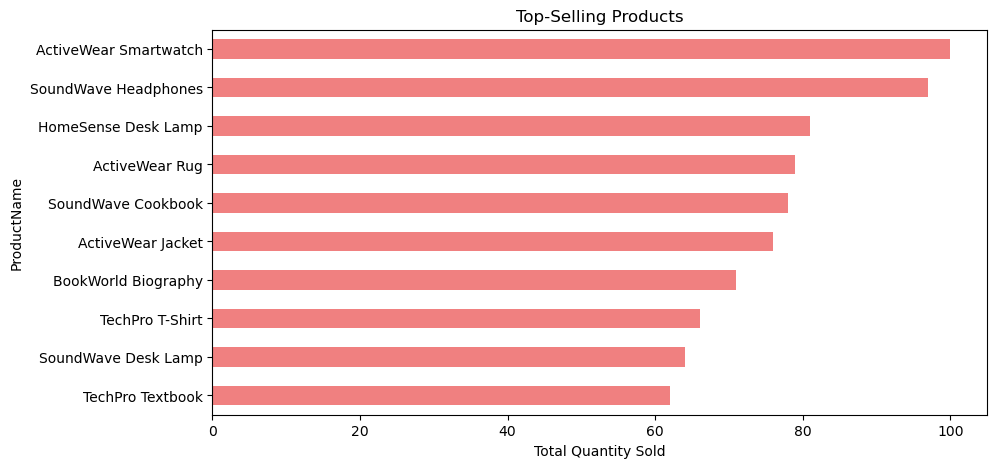

In [30]:
plt.figure(figsize=(10, 5))
top_products.plot(kind="barh", color="lightcoral")
plt.title("Top-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.gca().invert_yaxis()
plt.show()

In [31]:
# High-Value Customers
customer_revenue = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)
top_customers = customer_revenue.head(10)
print("\nTop High-Value Customers (Revenue):")
print(top_customers)


Top High-Value Customers (Revenue):
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


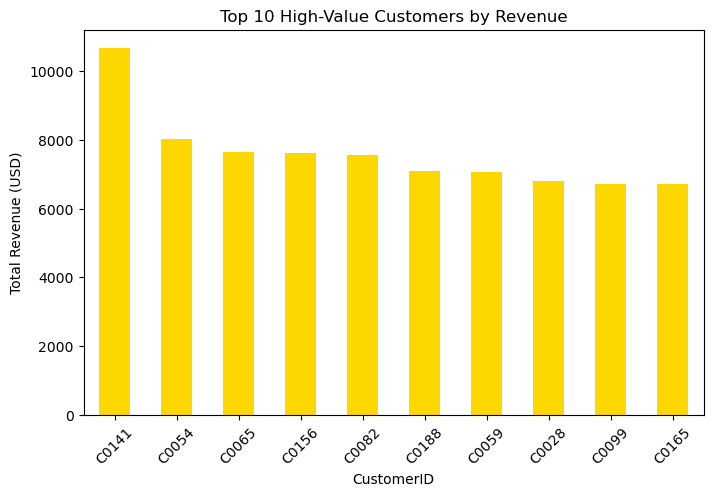

In [32]:
plt.figure(figsize=(8, 5))
top_customers.plot(kind="bar", color="gold")
plt.title("Top 10 High-Value Customers by Revenue")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

In [33]:
# Seasonality in Transactions
merged_data["TransactionMonth"] = merged_data["TransactionDate"].dt.month
monthly_transactions = merged_data.groupby("TransactionMonth")["TransactionID"].count()
print("\nMonthly Transaction Volume:")
print(monthly_transactions)


Monthly Transaction Volume:
TransactionMonth
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: TransactionID, dtype: int64


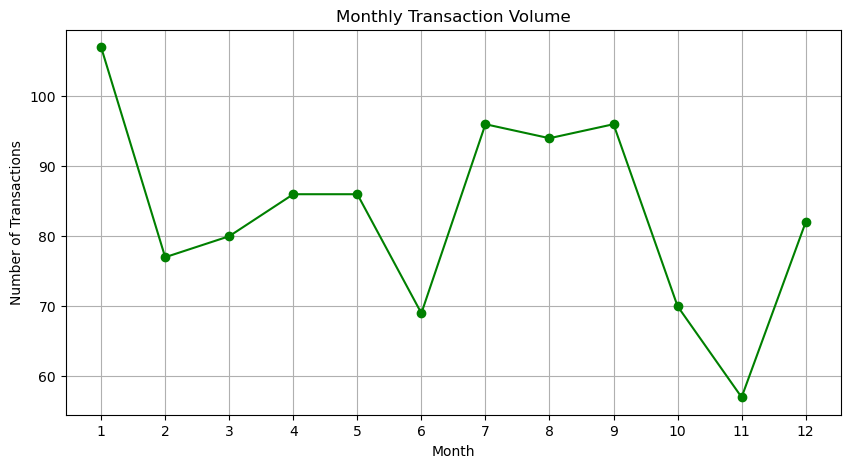

In [34]:
plt.figure(figsize=(10, 5))
monthly_transactions.plot(kind="line", marker="o", color="green")
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(range(1, 13))
plt.grid()
plt.show()

In [25]:
# New Customer Growth
merged_data["SignupYearMonth"] = merged_data["SignupDate"].dt.to_period("M")
signup_trends = merged_data.groupby("SignupYearMonth")["CustomerID"].nunique()
print("\nCustomer Signup Trends Over Time:")
print(signup_trends)


Customer Signup Trends Over Time:
SignupYearMonth
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     6
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: CustomerID, dtype: int64


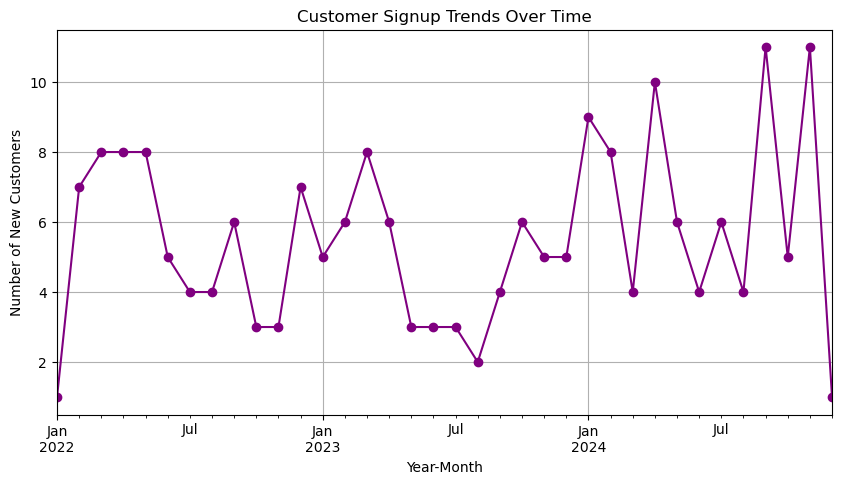

In [26]:
plt.figure(figsize=(10, 5))
signup_trends.plot(kind="line", marker="o", color="purple")
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of New Customers")
plt.grid()
plt.show()